In [13]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.stats as sms
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

%matplotlib inline
%run "util_formula.py"

data = pd.read_csv('P1TrainingData.csv', header=None)
column_names = [
'Target_Variable', 

# page features
'Page_Popularity', 'Page_Checkins', 'Page_talking_about','Page_Category', 

# derived (page) features
'CBB_Min','CBB_Max', 'CBB_Mean', 'CBB_Median','CBB_SD',
'CBBL24_Min','CBBL24_Max', 'CBBL24_Mean', 'CBBL24_Median','CBBL24_SD',
'CBBL48L24_Min','CBBL48L24_Max', 'CBBL48L24_Mean', 'CBBL48L24_Median','CBBL48L24_SD',
'CBBF24_Min','CBBF24_Max', 'CBBF24_Mean', 'CBBF24_Median','CBBF24_SD',
'Comment_Diff_Min','Comment_Diff_Max', 'Comment_Diff_Mean', 'Comment_Diff_Median','Comment_Diff_SD',

# essential features
'Comment_Bef_Base', 'Comment_Bef_Base_L24','Comment_Bef_Base_L48_L24', 'Comment_Bef_Base_F24', 'Comment_Diff_C2_C3', 

# other basic features
'Time_Gap', 'Post_Length', 'Post_Share', 'Promotion_Status', 'H_hrs',

# week of the day features
'Post_Weekday', 'Base_Weekday']

data.columns = column_names
data.drop('Promotion_Status', 1, inplace=True)
data.head()

,Target_Variable,Page_Popularity,Page_Checkins,Page_talking_about,Page_Category,CBB_Min,CBB_Max,CBB_Mean,CBB_Median,CBB_SD,...,Comment_Bef_Base_L24,Comment_Bef_Base_L48_L24,Comment_Bef_Base_F24,Comment_Diff_C2_C3,Time_Gap,Post_Length,Post_Share,H_hrs,Post_Weekday,Base_Weekday
0,0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,...,0,0,0,0,65,166,2,24,WED,SAT
1,0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,...,0,0,0,0,10,132,1,24,THU,FRI
2,0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,...,0,0,0,0,14,133,2,24,FRI,SAT
3,0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,...,0,3,7,-3,62,131,1,24,FRI,MON
4,0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,...,0,0,1,0,58,142,5,24,MON,WED


In [4]:
data_coded = pd.get_dummies(data, columns=["Post_Weekday"])
data_coded = pd.get_dummies(data_coded, columns=["Base_Weekday"])
data_coded = pd.get_dummies(data_coded, columns=["Page_Category"])

#Cubic Root transform
transformed_y = np.cbrt(data_coded.Target_Variable)
data_coded.Target_Variable = transformed_y

#Select non-categorical variabls
variables = []
for item in data_coded.columns[1:]:
    if 'Page_Cat' not in item:
        if 'Weekday' not in item:
                variables.append(item)
            
data_coded[variables] = np.cbrt(data_coded[variables])

y = 'Target_Variable'

In [449]:
int_variables = []
for item in candidate:
    if 'Page_Cat' not in item:
        if 'Weekday' not in item:
            if 'CBB' not in item:
                int_variables.append(item)

In [450]:
len(int_variables)

14

In [451]:
len(variables)

37

In [452]:
# include interactions in the predictors
cand_2Inter = []
for p1 in int_variables:
    for p2 in int_variables:
        if p1 != p2:
            cand_2Inter.append(p1+':'+p2);
                
print(len(cand_2Inter))

182


In [453]:
for item in cand_2Inter:
    candidate.append(item)

In [454]:
len(candidate)

228

In [456]:
formula = y + '~' + '+'.join(candidate)
# fit the regression model
model = smf.ols(formula=formula, data=data_coded).fit()

In [457]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Target_Variable   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     1167.
Date:                Sat, 30 Sep 2017   Prob (F-statistic):               0.00
Time:                        20:17:23   Log-Likelihood:                -32396.
No. Observations:               40949   AIC:                         6.507e+04
Df Residuals:                   40811   BIC:                         6.626e+04
Df Model:                         137                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [464]:
pvalues = pd.DataFrame(model.pvalues)

candidate_after_p_value = candidate.copy()
for item1 in  candidate:
    for item2 in pvalues[pvalues[0]>0.05].index.tolist():
        if item1 == item2:
            candidate_after_p_value.remove(item2)

print(len(candidate_after_p_value), len(candidate))

166 228


In [467]:
formula = y + '~' + '+'.join(candidate_after_p_value)
# fit the regression model
model = smf.ols(formula=formula, data=data_coded).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Target_Variable   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     1299.
Date:                Sat, 30 Sep 2017   Prob (F-statistic):               0.00
Time:                        20:18:09   Log-Likelihood:                -32418.
No. Observations:               40949   AIC:                         6.508e+04
Df Residuals:                   40825   BIC:                         6.615e+04
Df Model:                         123                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [469]:
pvalues = pd.DataFrame(model.pvalues)

candidate_after_p_value2 = candidate_after_p_value.copy()
for item1 in  candidate_after_p_value:
    for item2 in pvalues[pvalues[0]>0.05].index.tolist():
        if item1 == item2:
            candidate_after_p_value2.remove(item2)

print(len(candidate_after_p_value2), len(candidate_after_p_value))

In [471]:
formula = y + '~' + '+'.join(candidate_after_p_value2)
# fit the regression model
model = smf.ols(formula=formula, data=data_coded).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Target_Variable   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     2007.
Date:                Sat, 30 Sep 2017   Prob (F-statistic):               0.00
Time:                        20:18:51   Log-Likelihood:                -32562.
No. Observations:               40949   AIC:                         6.528e+04
Df Residuals:                   40869   BIC:                         6.597e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [474]:
pvalues = pd.DataFrame(model.pvalues)

candidate_after_p_value3 = candidate_after_p_value2.copy()
for item1 in  candidate_after_p_value2:
    for item2 in pvalues[pvalues[0]>0.05].index.tolist():
        if item1 == item2:
            candidate_after_p_value3.remove(item2)

print(len(candidate_after_p_value3), len(candidate_after_p_value2))

In [476]:
formula = y + '~' + '+'.join(candidate_after_p_value3)
# fit the regression model
model = smf.ols(formula=formula, data=data_coded).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Target_Variable   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     2007.
Date:                Sat, 30 Sep 2017   Prob (F-statistic):               0.00
Time:                        20:20:08   Log-Likelihood:                -32562.
No. Observations:               40949   AIC:                         6.528e+04
Df Residuals:                   40869   BIC:                         6.597e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [477]:
pvalues = pd.DataFrame(model.pvalues)

candidate_after_p_value4 = candidate_after_p_value3.copy()
for item1 in  candidate_after_p_value3:
    for item2 in pvalues[pvalues[0]>0.05].index.tolist():
        if item1 == item2:
            candidate_after_p_value4.remove(item2)
            
print(len(candidate_after_p_value4), len(candidate_after_p_value3))

formula = y + '~' + '+'.join(candidate_after_p_value4)
# fit the regression model
model = smf.ols(formula=formula, data=data_coded).fit()
print(model.summary())

112 116
                            OLS Regression Results                            
Dep. Variable:        Target_Variable   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     2114.
Date:                Sat, 30 Sep 2017   Prob (F-statistic):               0.00
Time:                        20:20:37   Log-Likelihood:                -32563.
No. Observations:               40949   AIC:                         6.528e+04
Df Residuals:                   40873   BIC:                         6.593e+04
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

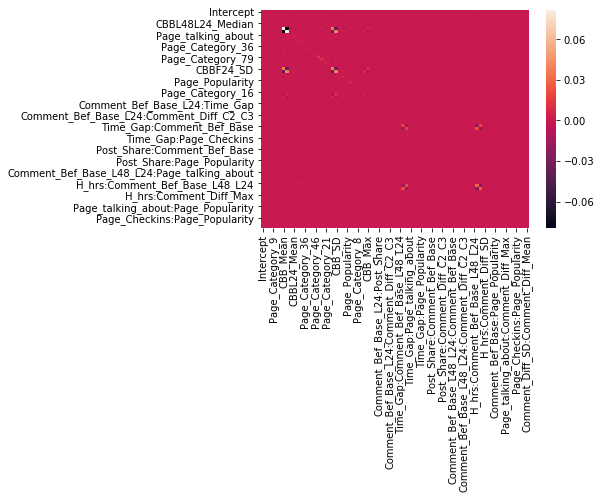

In [506]:
sns.heatmap(model.normalized_cov_params)

In [480]:
pvalues = pd.DataFrame(model.pvalues)
pvalues[pvalues[0]>0.05].index.tolist()

candidate_after_p_value5 = candidate_after_p_value4.copy()
for item1 in  candidate_after_p_value4:
    for item2 in pvalues[pvalues[0]>0.05].index.tolist():
        if item1 == item2:
            candidate_after_p_value5.remove(item2)
            
print(len(candidate_after_p_value5), len(candidate_after_p_value4))

formula = y + '~' + '+'.join(candidate_after_p_value5)
# fit the regression model
model = smf.ols(formula=formula, data=data_coded).fit()
print(model.summary())

112 112
                            OLS Regression Results                            
Dep. Variable:        Target_Variable   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     2114.
Date:                Sat, 30 Sep 2017   Prob (F-statistic):               0.00
Time:                        20:21:02   Log-Likelihood:                -32563.
No. Observations:               40949   AIC:                         6.528e+04
Df Residuals:                   40873   BIC:                         6.593e+04
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

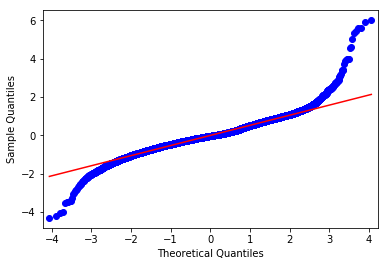

In [486]:
# check the normality of the data
fig = plt.figure(figsize=(6,6))
fig = sm.qqplot(model.resid, stats.distributions.norm, line='r') 

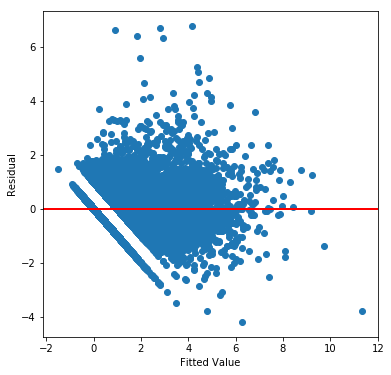

In [547]:
# plot the residuals vs fitted values
fig = plt.figure(figsize=(6,6))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, linewidth=2, color = 'r')
plt.xlabel('Fitted Value')
plt.ylabel('Residual')

## Feature selection by boosting tree feature importance (top 20)

In [5]:
can_scikit = ['Comment_Bef_Base_L24', 'Time_Gap', 'Post_Share',
       'Comment_Diff_C2_C3', 'Page_Popularity', 'Page_talking_about',
       'Comment_Bef_Base', 'CBBL24_Median', 'CBBL48L24_Median',
       'Post_Length', 'H_hrs', 'Page_Category_9', 'Comment_Bef_Base_F24',
       'Page_Checkins', 'Comment_Bef_Base_L48_L24', 'Comment_Diff_Mean',
       'CBBL24_Mean', 'Comment_Diff_Median', 'CBBF24_Median', 'CBBF24_Max']

variable2 = pd.DataFrame()
variable2['Predictors'] = can_scikit
print(variable2.to_latex())

\begin{tabular}{ll}
\toprule
{} &                Predictors \\
\midrule
0  &      Comment\_Bef\_Base\_L24 \\
1  &                  Time\_Gap \\
2  &                Post\_Share \\
3  &        Comment\_Diff\_C2\_C3 \\
4  &           Page\_Popularity \\
5  &        Page\_talking\_about \\
6  &          Comment\_Bef\_Base \\
7  &             CBBL24\_Median \\
8  &          CBBL48L24\_Median \\
9  &               Post\_Length \\
10 &                     H\_hrs \\
11 &           Page\_Category\_9 \\
12 &      Comment\_Bef\_Base\_F24 \\
13 &             Page\_Checkins \\
14 &  Comment\_Bef\_Base\_L48\_L24 \\
15 &         Comment\_Diff\_Mean \\
16 &               CBBL24\_Mean \\
17 &       Comment\_Diff\_Median \\
18 &             CBBF24\_Median \\
19 &                CBBF24\_Max \\
\bottomrule
\end{tabular}



In [6]:
can_int_scikit = []
for item in can_scikit:
    for item1 in can_scikit:
        can_int_scikit.append(item+':'+item1)

In [7]:
for item in can_int_scikit:
    can_scikit.append(item)

In [8]:
formula = y + '~' + '+'.join(can_scikit)
# fit the regression model
model = smf.ols(formula=formula, data=data_coded).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Target_Variable   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     785.1
Date:                Thu, 05 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:35:21   Log-Likelihood:                -31870.
No. Observations:               40949   AIC:                         6.416e+04
Df Residuals:                   40738   BIC:                         6.598e+04
Df Model:                         210                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [9]:
pvalues = pd.DataFrame(model.pvalues)
pvalues[pvalues[0]>0.05].index.tolist()

can_scikit1 = can_scikit.copy()
for item1 in  can_scikit:
    for item2 in pvalues[pvalues[0]>0.05].index.tolist():
        if item1 == item2:
            can_scikit1.remove(item2)
            
print(len(can_scikit1), len(can_scikit))

formula = y + '~' + '+'.join(can_scikit1)
# fit the regression model
model = smf.ols(formula=formula, data=data_coded).fit()
print(model.summary())

304 420
                            OLS Regression Results                            
Dep. Variable:        Target_Variable   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     785.1
Date:                Thu, 05 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:35:24   Log-Likelihood:                -31870.
No. Observations:               40949   AIC:                         6.416e+04
Df Residuals:                   40738   BIC:                         6.598e+04
Df Model:                         210                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [10]:
pvalues = pd.DataFrame(model.pvalues)
pvalues[pvalues[0]>0.05].index.tolist()

can_scikit2 = can_scikit1.copy()
for item1 in  can_scikit1:
    for item2 in pvalues[pvalues[0]>0.05].index.tolist():
        if item1 == item2:
            can_scikit2.remove(item2)
            
print(len(can_scikit2), len(can_scikit1))

formula = y + '~' + '+'.join(can_scikit2)
# fit the regression model
model = smf.ols(formula=formula, data=data_coded).fit()
print(model.summary())

201 304
                            OLS Regression Results                            
Dep. Variable:        Target_Variable   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     1522.
Date:                Thu, 05 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:35:24   Log-Likelihood:                -32116.
No. Observations:               40949   AIC:                         6.445e+04
Df Residuals:                   40841   BIC:                         6.538e+04
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [11]:
print(model.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}                                       & Target_Variable  & \textbf{  R-squared:         } &     0.799   \\
\textbf{Model:}                                               &       OLS        & \textbf{  Adj. R-squared:    } &     0.799   \\
\textbf{Method:}                                              &  Least Squares   & \textbf{  F-statistic:       } &     1522.   \\
\textbf{Date:}                                                & Thu, 05 Oct 2017 & \textbf{  Prob (F-statistic):} &     0.00    \\
\textbf{Time:}                                                &     13:35:24     & \textbf{  Log-Likelihood:    } &   -32116.   \\
\textbf{No. Observations:}                                    &       40949      & \textbf{  AIC:               } & 6.445e+04   \\
\textbf{Df Residuals:}                                        &       40841      & \textbf{  BIC:               } & 6.538e+04   \\
\textbf{Df Model:}                   

In [14]:
kfold = KFold(n=data_coded.shape[0], n_folds=20, shuffle=True, random_state=0)
result = CrossValidation(y, can_scikit2, data_coded, kfold)
446.301013pd.DataFrame(result).mean()

MAE      3.658939
MSE    446.301013
dtype: float64

In [15]:
print(pd.DataFrame(result).to_latex())

\begin{tabular}{lrr}
\toprule
{} &       MAE &          MSE \\
\midrule
0  &  2.902373 &   146.374018 \\
1  &  3.560299 &   362.600952 \\
2  &  3.768702 &   412.997428 \\
3  &  3.051363 &   149.435547 \\
4  &  3.548811 &   275.254989 \\
5  &  3.942151 &   947.329354 \\
6  &  3.410386 &   306.653846 \\
7  &  4.319872 &   876.712590 \\
8  &  2.993184 &   168.879596 \\
9  &  3.731502 &   491.642907 \\
10 &  4.235156 &  1032.601620 \\
11 &  3.438691 &   217.428396 \\
12 &  3.308620 &   295.118419 \\
13 &  4.192867 &   391.431910 \\
14 &  4.747604 &   906.253668 \\
15 &  3.699576 &   215.585194 \\
16 &  2.972562 &   206.520001 \\
17 &  3.755930 &   478.474729 \\
18 &  3.969618 &   829.406963 \\
19 &  3.629519 &   215.318129 \\
\bottomrule
\end{tabular}



In [16]:
print(pd.DataFrame(result).describe().to_latex())

\begin{tabular}{lrr}
\toprule
{} &        MAE &          MSE \\
\midrule
count &  20.000000 &    20.000000 \\
mean  &   3.658939 &   446.301013 \\
std   &   0.489675 &   298.742779 \\
min   &   2.902373 &   146.374018 \\
25\%   &   3.384944 &   215.518428 \\
50\%   &   3.664548 &   334.627399 \\
75\%   &   3.949018 &   576.083921 \\
max   &   4.747604 &  1032.601620 \\
\bottomrule
\end{tabular}



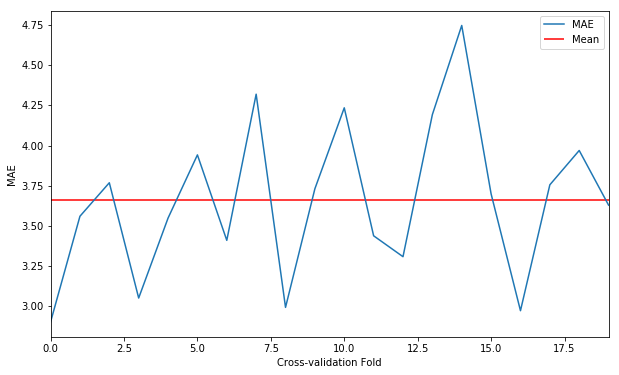

In [20]:
ar2 = pd.DataFrame(result)[['MAE']]
plt.figure(figsize=[10,6])
plt.plot(ar2)
plt.ylabel('MAE')
plt.xlabel('Cross-validation Fold')
plt.xlim(xmin=0, xmax=19)
plt.hlines(xmin=0, xmax=19,y=3.658939, colors='r')
plt.legend(['MAE', 'Mean'])

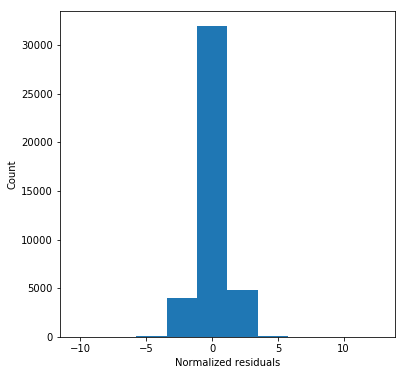

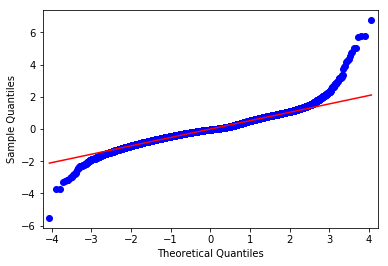

In [15]:
res = model.resid

f1 = plt.figure(figsize=(6,6))
f1 = plt.hist(model.resid_pearson)
f1 = plt.ylabel('Count')
f1 = plt.xlabel('Normalized residuals') 

fig = plt.figure(figsize=(6,6))
fig = sm.qqplot(res, stats.distributions.norm, line='r') 
# plt.show()

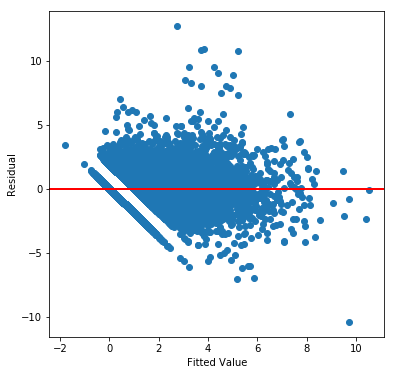

In [16]:
# plot the residuals vs fitted values
fig = plt.figure(figsize=(6,6))
plt.scatter(model.fittedvalues, model.resid_pearson)
plt.axhline(y=0, linewidth=2, color = 'r')
plt.xlabel('Fitted Value')
plt.ylabel('Residual')

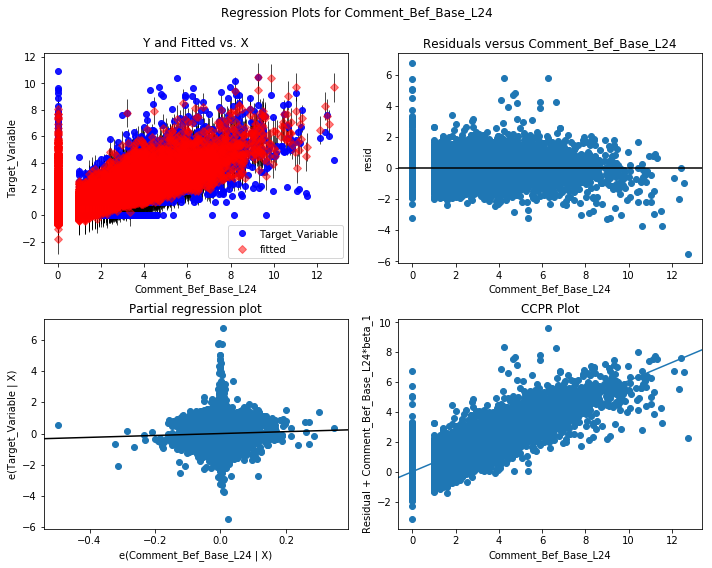

In [721]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(model, "Comment_Bef_Base_L24", fig=fig)

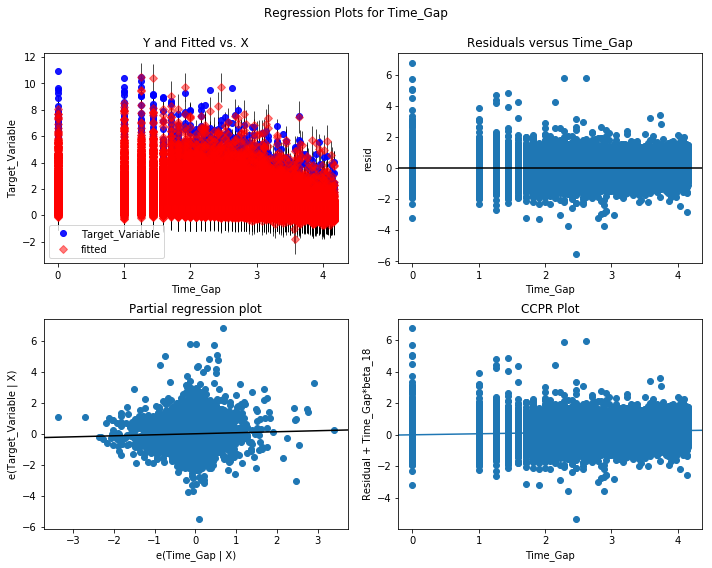

In [714]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(model, "Time_Gap", fig=fig)

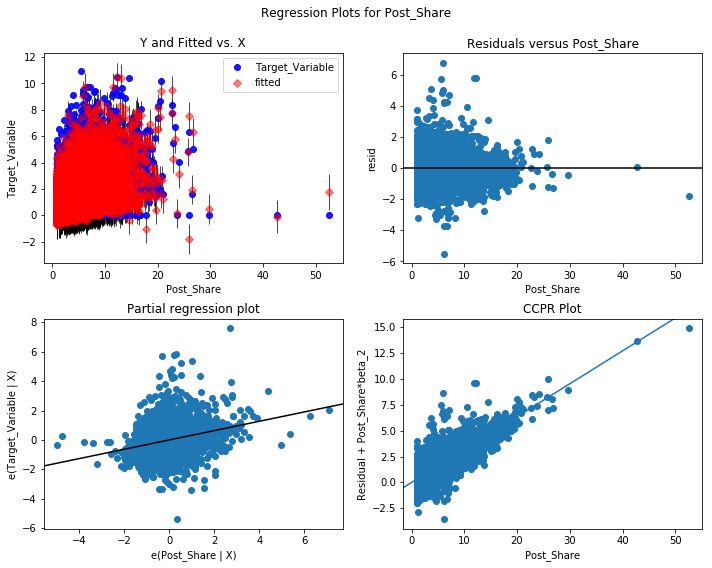

In [715]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(model, "Post_Share", fig=fig)

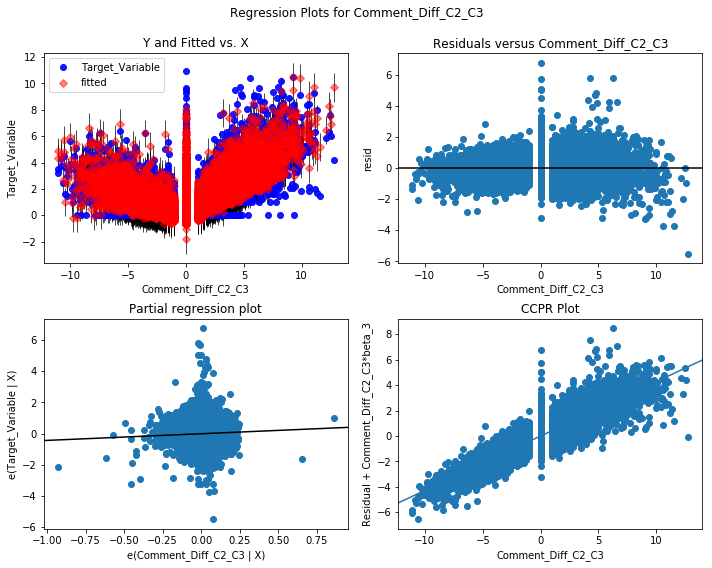

In [716]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(model, "Comment_Diff_C2_C3", fig=fig)

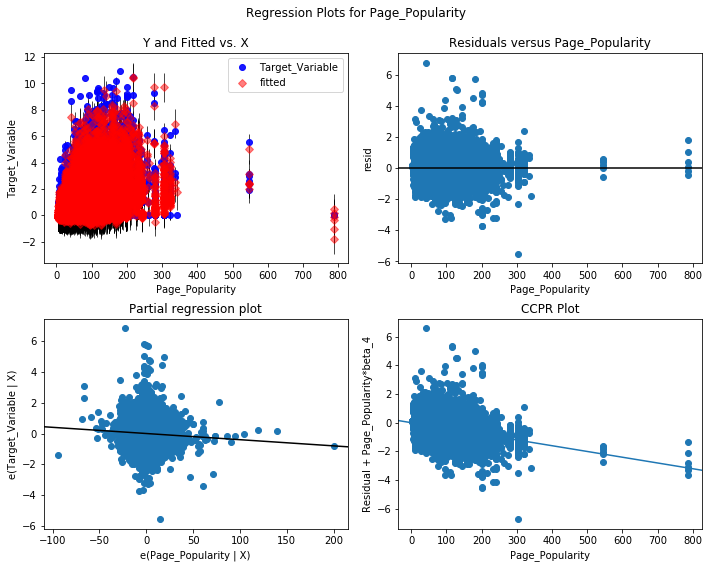

In [722]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(model, "Page_Popularity", fig=fig)

# Test Data

In [747]:
test_data = pd.read_csv('P1TestingData.csv', header=None)
column_names = [
'Target_Variable', 

# page features
'Page_Popularity', 'Page_Checkins', 'Page_talking_about','Page_Category', 

# derived (page) features
'CBB_Min','CBB_Max', 'CBB_Mean', 'CBB_Median','CBB_SD',
'CBBL24_Min','CBBL24_Max', 'CBBL24_Mean', 'CBBL24_Median','CBBL24_SD',
'CBBL48L24_Min','CBBL48L24_Max', 'CBBL48L24_Mean', 'CBBL48L24_Median','CBBL48L24_SD',
'CBBF24_Min','CBBF24_Max', 'CBBF24_Mean', 'CBBF24_Median','CBBF24_SD',
'Comment_Diff_Min','Comment_Diff_Max', 'Comment_Diff_Mean', 'Comment_Diff_Median','Comment_Diff_SD',

# essential features
'Comment_Bef_Base', 'Comment_Bef_Base_L24','Comment_Bef_Base_L48_L24', 'Comment_Bef_Base_F24', 'Comment_Diff_C2_C3', 

# other basic features
'Time_Gap', 'Post_Length', 'Post_Share', 'Promotion_Status', 'H_hrs',

# week of the day features
'Post_Weekday', 'Base_Weekday']

test_data.columns = column_names
test_data.drop('Promotion_Status', 1, inplace=True)
test_data.head()

,Target_Variable,Page_Popularity,Page_Checkins,Page_talking_about,Page_Category,CBB_Min,CBB_Max,CBB_Mean,CBB_Median,CBB_SD,...,Comment_Bef_Base_L24,Comment_Bef_Base_L48_L24,Comment_Bef_Base_F24,Comment_Diff_C2_C3,Time_Gap,Post_Length,Post_Share,H_hrs,Post_Weekday,Base_Weekday
0,0,33326385,157,27408,47,61.0,341.0,137.428571,109.5,69.209531,...,101,0,101,101,3,215,99,24,SAT,SAT
1,0,722396,0,17374,53,15.0,207.0,59.666667,31.0,67.269772,...,9,45,48,-36,44,175,13,24,THU,SAT
2,0,3135552,0,33619,86,0.0,60.0,23.666667,11.0,26.081070,...,60,0,60,60,15,115,80,24,FRI,SAT
3,0,971274,0,329530,20,0.0,2160.0,125.304569,13.0,369.449568,...,1,0,1,1,2,147,3,4,MON,MON
4,0,4290409,11,131422,9,0.0,937.0,126.380952,64.0,167.505643,...,22,0,22,22,1,190,18,24,SAT,SAT


In [748]:
test_data_coded = pd.get_dummies(test_data, columns=["Post_Weekday"])
test_data_coded = pd.get_dummies(test_data_coded, columns=["Base_Weekday"])
test_data_coded = pd.get_dummies(test_data_coded, columns=["Page_Category"])

#Select non-categorical variabls
variables = []
for item in test_data_coded.columns[1:]:
    if 'Page_Cat' not in item:
        if 'Weekday' not in item:
                variables.append(item)

# Cube root transform non-categorical predictors            
test_data_coded[variables] = np.cbrt(test_data_coded[variables])

y = 'Target_Variable'

In [778]:
y_pred = model.predict(test_data_coded.iloc[:,1:])

In [779]:
y_pred_df = pd.DataFrame()
y_pred_df['Prediction'] = y_pred

In [780]:
y_pred_df['Rev_Trans_Pred'] = np.power(y_pred, 3)

In [809]:
y_pred_df.head()

,Prediction,Rev_Trans_Pred
0,3.670417,49.447727
1,1.008907,1.026960
2,2.251930,11.419965
3,0.916221,0.769130
4,3.060771,28.674280


In [781]:
y_pred_df.replace(y_pred_df[y_pred_df.Rev_Trans_Pred<0], 0, inplace=True)

In [807]:
y_pred_df[y_pred_df.Rev_Trans_Pred<0].Rev_Trans_Pred

Series([], Name: Rev_Trans_Pred, dtype: float64)

In [787]:
y_pred_df.Rev_Trans_Pred.to_excel('Prediction.xlsx')

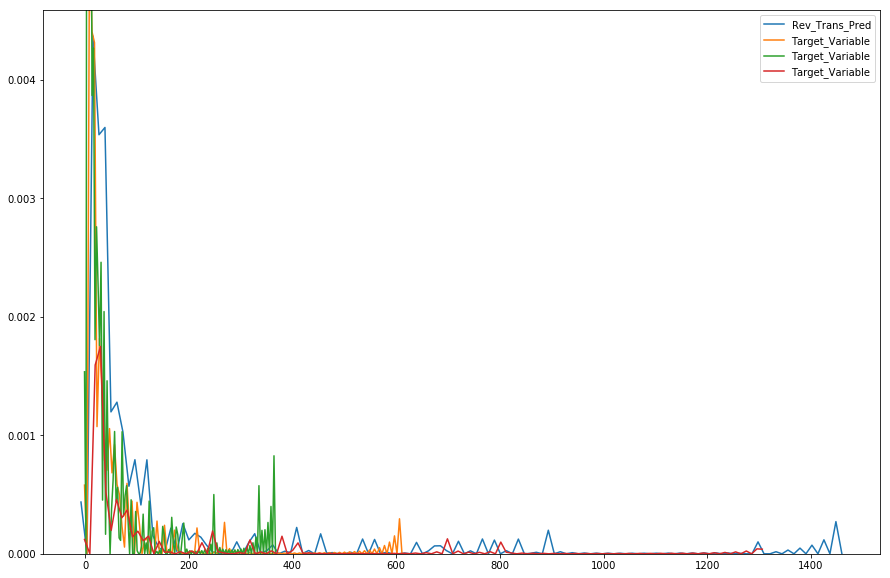

In [806]:
plt.figure(figsize=[15,10])
sns.kdeplot(y_pred_df.Rev_Trans_Pred)
sns.kdeplot(data.sample(1000).Target_Variable)
sns.kdeplot(data.sample(1000).Target_Variable)
sns.kdeplot(data.sample(1000).Target_Variable)